

- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# import biblioteka

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [65]:
from matplotlib import colors

pal = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(pal)

# predstavljanje podataka

In [66]:
data = pd.read_csv("./data/customer-analytics.csv", sep=',')

data.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [67]:
data = data.drop(columns='ID')

In [68]:
data.shape

(10999, 11)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [70]:
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [71]:
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [72]:

print(f"Pre uklanjanja duplikata: {data.count()}")
data.drop_duplicates(subset=None,inplace=True)
print(f"Nakon uklanjanja duplikata: {data.count()}")



Pre uklanjanja duplikata: Warehouse_block        10999
Mode_of_Shipment       10999
Customer_care_calls    10999
Customer_rating        10999
Cost_of_the_Product    10999
Prior_purchases        10999
Product_importance     10999
Gender                 10999
Discount_offered       10999
Weight_in_gms          10999
Reached.on.Time_Y.N    10999
dtype: int64
Nakon uklanjanja duplikata: Warehouse_block        10999
Mode_of_Shipment       10999
Customer_care_calls    10999
Customer_rating        10999
Cost_of_the_Product    10999
Prior_purchases        10999
Product_importance     10999
Gender                 10999
Discount_offered       10999
Weight_in_gms          10999
Reached.on.Time_Y.N    10999
dtype: int64


In [73]:
num_rows = (len(data.columns) - 1) // 2 + 1
num_columns = min(4, len(data.columns))

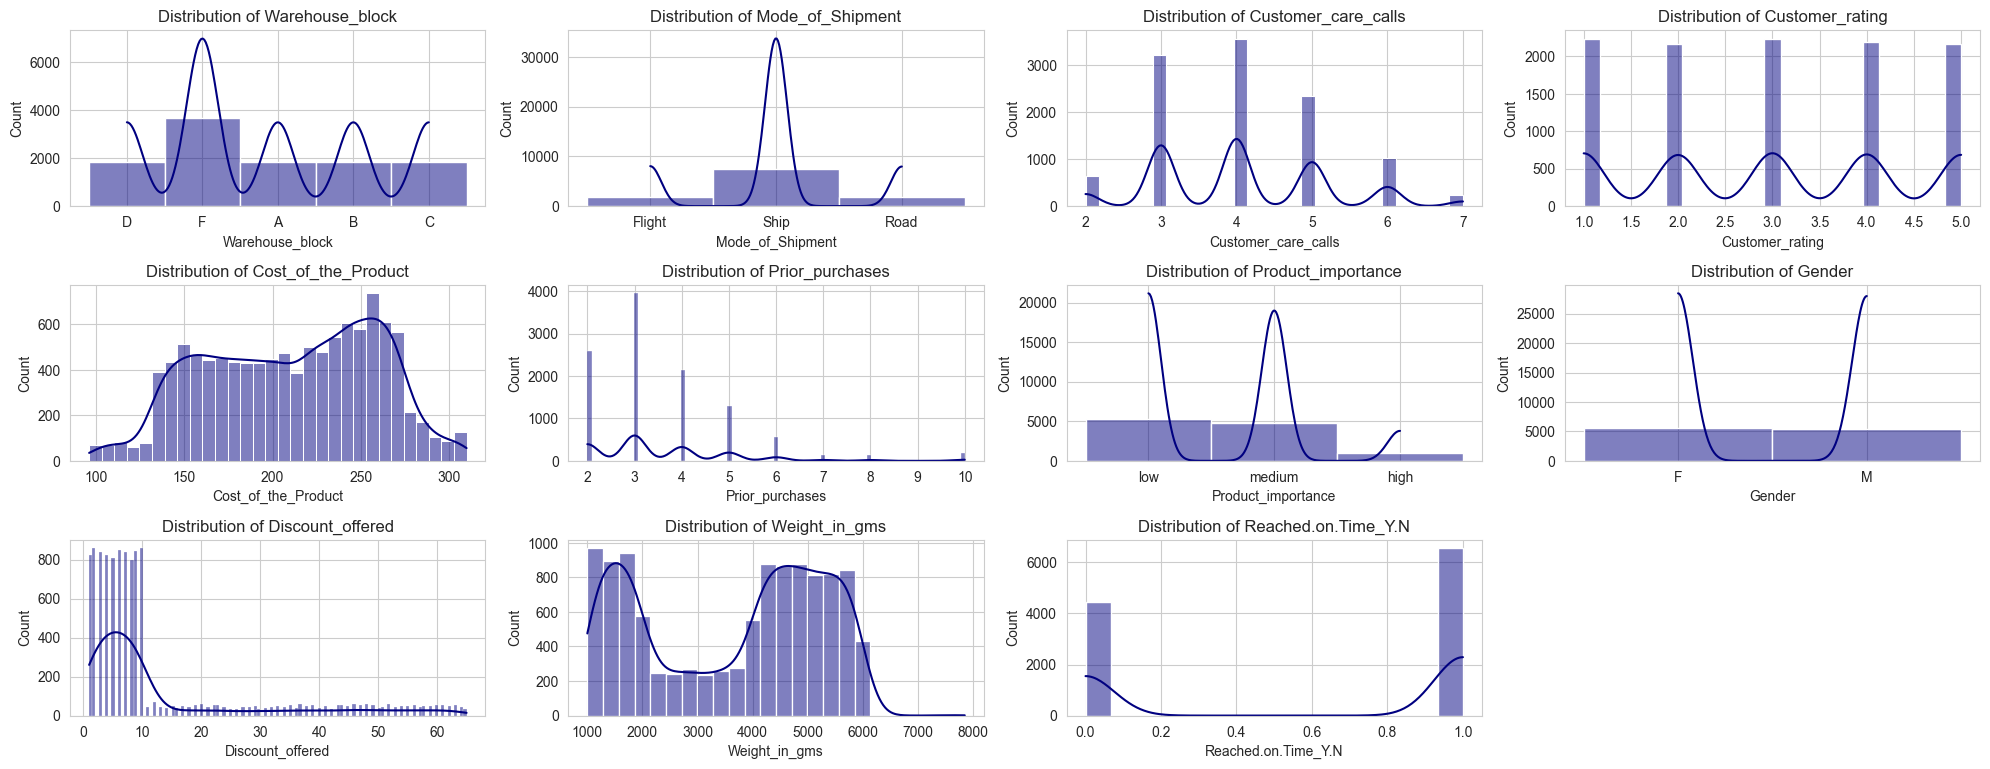

In [74]:
plt.figure(figsize=(20, 15))

for i, attribute in enumerate(data.columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(data[attribute], kde=True, color='navy')
    plt.title(f'Distribution of {attribute}')

plt.tight_layout()
plt.show()

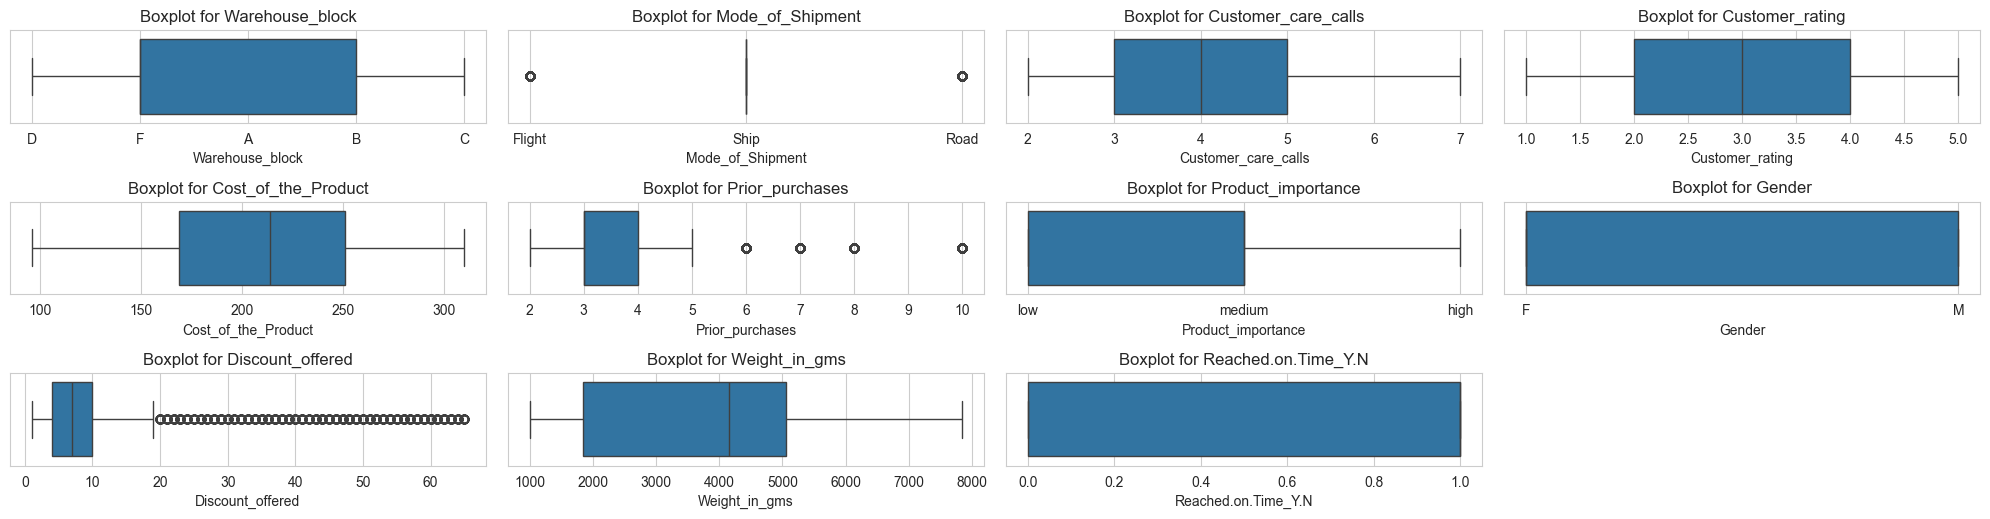

In [75]:
plt.figure(figsize=(20, 10))

for i, attribute in enumerate(data.columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=data[attribute])
    plt.title(f'Boxplot for {attribute}')

plt.tight_layout()
plt.show()


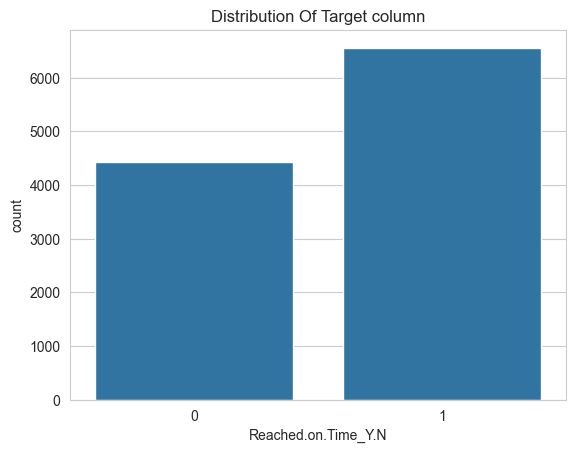

In [100]:
pl = sns.countplot(x=data['Reached.on.Time_Y.N'])
pl.set_title("Distribution Of Target column")
plt.show()

In [76]:
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


# preprocesiranje

In [78]:
objectCols = ['Warehouse_block','Mode_of_Shipment','Product_importance',"Gender"]

In [79]:
for o in objectCols:
    print(o.capitalize() + ':\n', data[o].unique())

Warehouse_block:
 ['D' 'F' 'A' 'B' 'C']
Mode_of_shipment:
 ['Flight' 'Ship' 'Road']
Product_importance:
 ['low' 'medium' 'high']
Gender:
 ['F' 'M']


In [80]:
data['Warehouse_block'] = data['Warehouse_block'].map({ 'A' : 1 , 'B' : 2 , 'C' : 3 , 'D' : 4 , 'F' : 5 })

data['Mode_of_Shipment'] = data['Mode_of_Shipment'].map({'Flight':1,'Ship':2, "Road": 1})

data['Product_importance'] = data['Product_importance'].map({'low':1,'medium':2, "high": 3})

data['Gender'] = data['Gender'].map({'F':1,'M':0})

data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,1,4,2,177,3,1,1,44,1233,1
1,5,1,4,5,216,2,1,0,59,3088,1
2,1,1,2,2,183,4,1,0,48,3374,1
3,2,1,3,3,176,4,2,0,10,1177,1
4,3,1,2,2,184,3,2,1,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,1,2,4,1,252,5,2,1,1,1538,1
10995,2,2,4,1,232,5,2,1,6,1247,0
10996,3,2,5,4,242,5,1,1,4,1155,0
10997,5,2,5,2,223,6,2,0,2,1210,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int64
 1   Mode_of_Shipment     10999 non-null  int64
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int64
 7   Gender               10999 non-null  int64
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB


C:\Users\Vi\AppData\Local\Temp\ipykernel_5492\1152024849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mode_of_Shipment', data=data, palette=sns.color_palette("viridis"))
C:\Users\Vi\AppData\Local\Temp\ipykernel_5492\1152024849.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Mode_of_Shipment', data=data, palette=sns.color_palette("viridis"))


<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

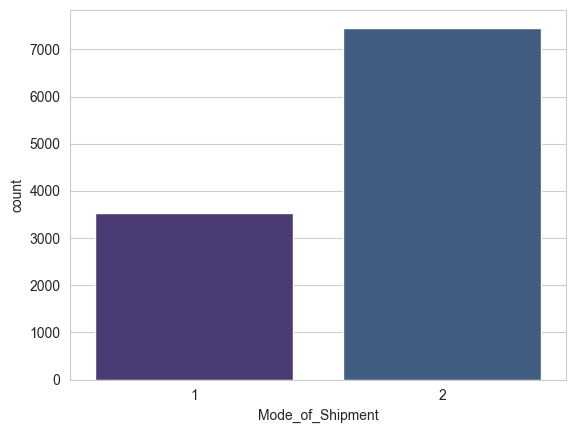

In [82]:
fig, ax = plt.subplots()

sns.countplot(x='Mode_of_Shipment', data=data, palette=sns.color_palette("viridis"))

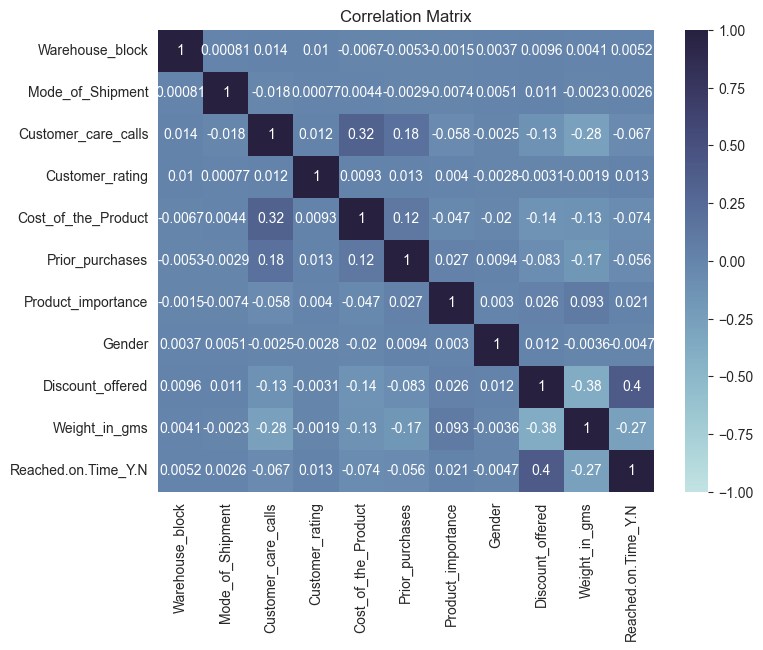

In [83]:
corr_matrix = data.corr()

plt.figure(figsize=(8,6))
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [84]:

X = data.drop('Reached.on.Time_Y.N', axis=1)
y = data['Reached.on.Time_Y.N']


In [85]:
X.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [86]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
print ('Dimenzije matrice X za treniranje: ', X_train.shape)
print ('Dimenzije matrice X za testiranje: ', X_test.shape)
print ('Dimenzija vektora "y" za treniranje: ', y_train.shape)
print ('Dimenzija vektora "y" za testiranje: ', y_test.shape)


Dimenzije matrice X za treniranje:  (8799, 10)
Dimenzije matrice X za testiranje:  (2200, 10)
Dimenzija vektora "y" za treniranje:  (8799,)
Dimenzija vektora "y" za testiranje:  (2200,)


In [87]:

# Normalizacija trening skupa (slično radi i MinMaxScaler)
X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_range = (X_train_max- X_train_min)
X_train_scaled = (X_train - X_train_min)/(X_train_range)
print(X_train_scaled.head())


      Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
8929             1.00               1.0                  0.4             0.50   
9127             1.00               1.0                  0.8             0.50   
8234             0.00               0.0                  0.8             0.50   
3900             0.75               1.0                  0.2             0.25   
2699             1.00               1.0                  0.4             0.25   

      Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
8929             0.808411            0.375                 0.0     0.0   
9127             0.570093            0.500                 1.0     1.0   
8234             0.621495            0.750                 0.5     0.0   
3900             0.579439            0.125                 0.5     0.0   
2699             0.387850            0.125                 1.0     1.0   

      Discount_offered  Weight_in_gms  
8929          0.015625      

In [88]:

# Normalizacija test skupa
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range


# model

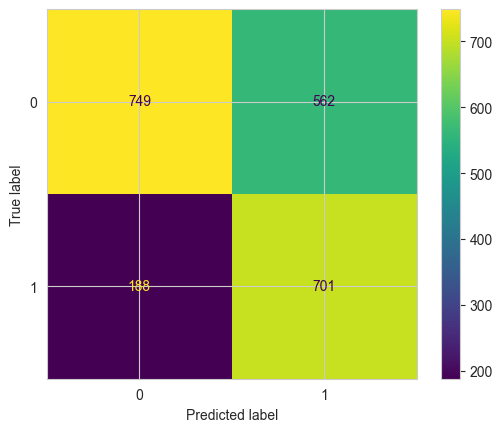

In [89]:

# Kreiranje i obučavanje SVM modela 
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

y_predict = svc_model.predict(X_test_scaled)

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
ConfusionMatrixDisplay(cm).plot()


In [90]:

# Prikazuju se izvedene mere - preciznost, odziv, F-mera
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.56      0.79      0.65       889
           1       0.80      0.57      0.67      1311

    accuracy                           0.66      2200
   macro avg       0.68      0.68      0.66      2200
weighted avg       0.70      0.66      0.66      2200



# grid search

In [95]:


from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 2, 5], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
# grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=4)
# grid.fit(X_train_scaled,y_train)
# print("Najbolja kombinacija parametara:")
# print(grid.best_params_)
# print()
# print(grid.best_estimator_)
# print()

# SVC(C=1, gamma=0.01)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   1.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   1.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   1.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.655 total time=   1.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time=   1.3s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.663 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.662 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.668 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.651 total time=   0.6s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.670 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.665 total time=   1.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

# best model

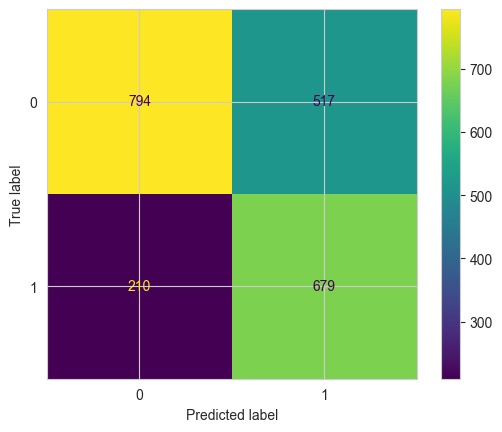

In [93]:


svc_model = SVC(C=1, gamma=0.01)
svc_model.fit(X_train_scaled, y_train)

y_predict = svc_model.predict(X_test_scaled)

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
ConfusionMatrixDisplay(cm).plot()


In [94]:

print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.57      0.76      0.65       889
           1       0.79      0.61      0.69      1311

    accuracy                           0.67      2200
   macro avg       0.68      0.68      0.67      2200
weighted avg       0.70      0.67      0.67      2200

